# Load libraries

In [69]:
# importing all necessary libraries

# pip install -r requirements.txt

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from datetime import datetime, timedelta
import statsmodels.api as sm
import gc
from pylab import rcParams
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import gc
import lightgbm as lgb
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import lightgbm as lgb
import calendar

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
import multiprocessing as mp
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Load data

In [70]:
# Reading datasets

train = pd.read_csv('input/train.csv')

# Date

train['date'] = pd.to_datetime(train['date'])

# Data Exploration

In [71]:
# Print head

print("Head rows of train data")
train.head()

Head rows of train data


,id,date,year_week,product_number,reporterhq_id,prod_category,specs,display_size,segment,sales_units,inventory_units
0,202224-2961,2022-06-18,202224,2961,15,Doraemon,186631,15.6,Gaming,52.0,88.0
1,202225-2961,2022-06-25,202225,2961,15,Doraemon,186631,15.6,Gaming,6.0,88.0
2,202226-2961,2022-07-02,202226,2961,15,Doraemon,186631,15.6,Gaming,60.0,138.0
3,202227-2961,2022-07-09,202227,2961,15,Doraemon,186631,15.6,Gaming,158.0,65.0
4,202228-2961,2022-07-16,202228,2961,15,Doraemon,186631,15.6,Gaming,23.0,30.0


In [72]:
# Information about data

print("Complete information about train data")
print(train.info())

Complete information about train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25139 entries, 0 to 25138
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               25139 non-null  object        
 1   date             25139 non-null  datetime64[ns]
 2   year_week        25139 non-null  int64         
 3   product_number   25139 non-null  int64         
 4   reporterhq_id    25139 non-null  int64         
 5   prod_category    25139 non-null  object        
 6   specs            25139 non-null  int64         
 7   display_size     25139 non-null  float64       
 8   segment          25139 non-null  object        
 9   sales_units      24642 non-null  float64       
 10  inventory_units  24639 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 2.1+ MB
None


In [73]:
# Categorical variables

In [74]:
print("There are these unique reporterhq_id in train =",train['reporterhq_id'].unique())
print("There are these unique prod_category in train =",train['prod_category'].unique())
print("There are these unique specs in train =",train['specs'].unique()) # Too much ctategories
print("There are these unique display_size in train =",train['display_size'].unique())
print("There are these unique segment in train =",train['segment'].unique())

There are these unique reporterhq_id in train = [15 93 90 12 78 24 60  6  3  9 72 21 87 48 96 84 39 27 81 36]
There are these unique prod_category in train = ['Doraemon' 'Arale' 'Goku' 'Clover' 'Conan' 'Luffy' 'Bobobo']
There are these unique display_size in train = [15.6 13.3 14.  16.1 17.3 11.6 13.5 11.  12. ]
There are these unique segment in train = ['Gaming' 'Premium' 'Core']


## Numerical variables

### Sales Units

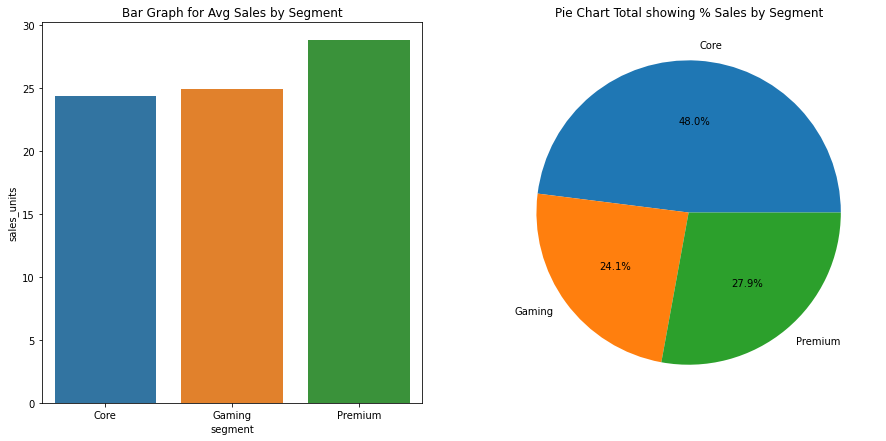

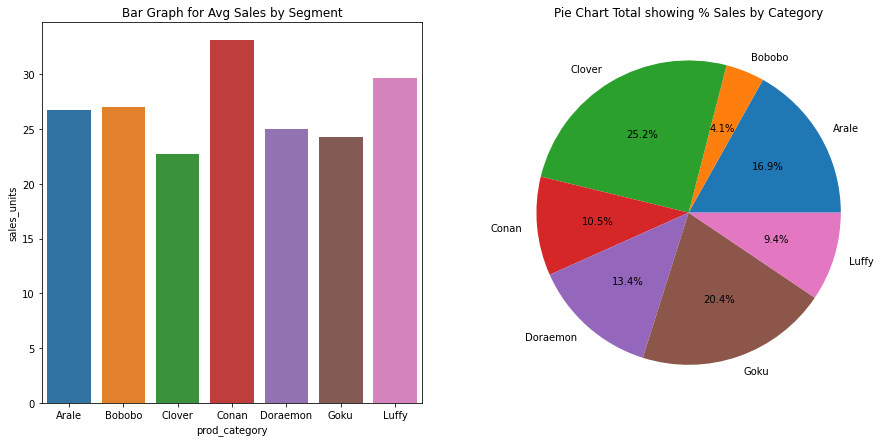

In [75]:
# Avg Sales by segment / prod category

df = train.groupby('segment').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.barplot(x='segment',y='sales_units',data=df)
plt.title("Bar Graph for Avg Sales by Segment")

df = train.groupby('segment').sum()
df.reset_index(level=0,inplace=True)
df['perc']=df['sales_units']/sum(df['sales_units'].values)*100
plt.subplot(122)
plt.pie(df['perc'].values,labels=df['segment'].values,autopct='%1.1f%%')
plt.title("Pie Chart Total showing % Sales by Segment")
plt.show()

# Avg Sales by segment / prod category

df = train.groupby('prod_category').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.barplot(x='prod_category',y='sales_units',data=df)
plt.title("Bar Graph for Avg Sales by Segment")

df=train.groupby('prod_category').sum()
df.reset_index(level=0,inplace=True)
df['perc']=df['sales_units']/sum(df['sales_units'].values)*100
plt.subplot(122)
plt.pie(df['perc'].values,labels=df['prod_category'].values,autopct='%1.1f%%')
plt.title("Pie Chart Total showing % Sales by Category")
plt.show()

### Inventory Units

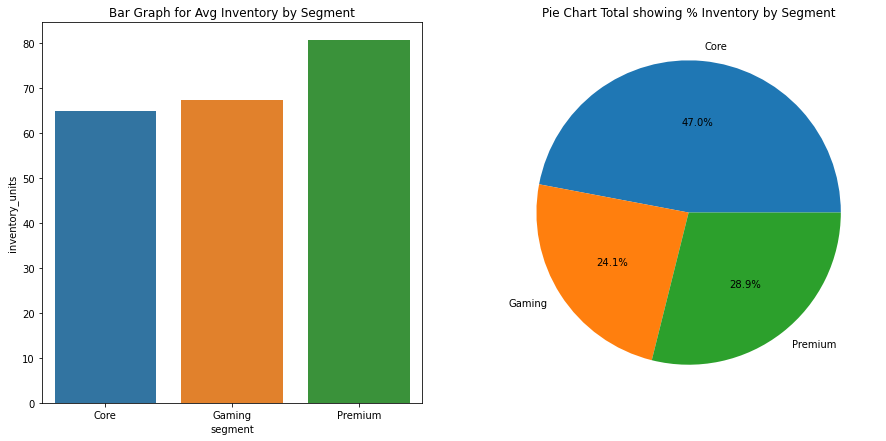

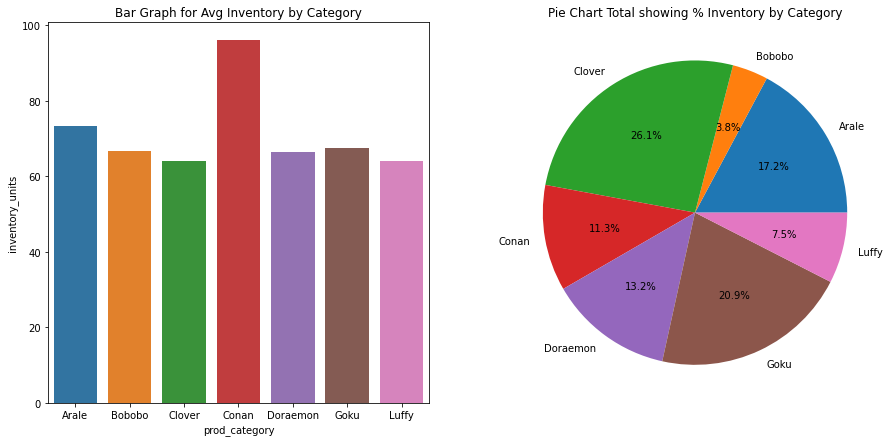

In [76]:
# Avg Sales by segment / prod category

df = train.groupby('segment').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.barplot(x='segment',y='inventory_units',data=df)
plt.title("Bar Graph for Avg Inventory by Segment")

df=train.groupby('segment').sum()
df.reset_index(level=0,inplace=True)
df['perc']=df['inventory_units']/sum(df['inventory_units'].values)*100
plt.subplot(122)
plt.pie(df['perc'].values,labels=df['segment'].values,autopct='%1.1f%%')
plt.title("Pie Chart Total showing % Inventory by Segment")
plt.show()

# Avg Sales by segment / prod category

df=train.groupby('prod_category').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.barplot(x='prod_category',y='inventory_units',data=df)
plt.title("Bar Graph for Avg Inventory by Category")

df=train.groupby('prod_category').sum()
df.reset_index(level=0,inplace=True)
df['perc']=df['inventory_units']/sum(df['inventory_units'].values)*100
plt.subplot(122)
plt.pie(df['perc'].values,labels=df['prod_category'].values,autopct='%1.1f%%')
plt.title("Pie Chart Total showing % Inventory by Category")
plt.show()

In [77]:
## Correlations

train.corr()

(484, 9)

## Time Series

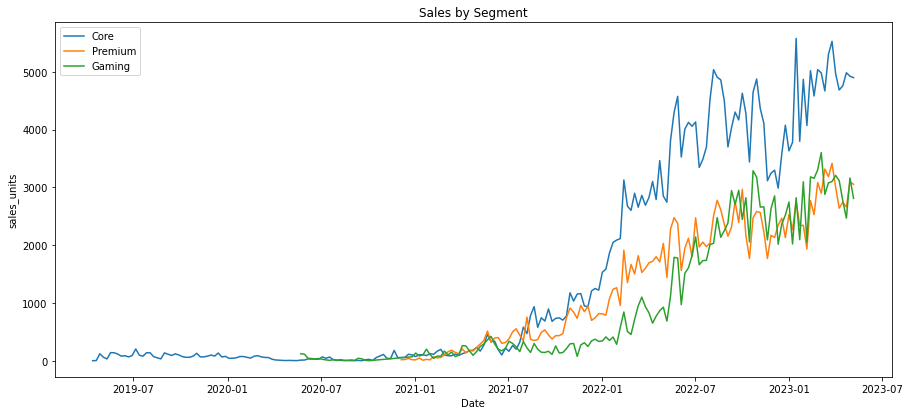

In [78]:
# Sales by segment

df = train.groupby(['date','segment']).sum()
df = df.reset_index()
plt.figure(figsize=(15,30))
plt.subplot(411)
plt.plot(df[df['segment']=="Core"]['date'].values, df[df['segment']=="Core"]['sales_units'].values,label="Core")
plt.plot(df[df['segment']=="Premium"]['date'].values, df[df['segment']=="Premium"]['sales_units'].values,label="Premium")
plt.plot(df[df['segment']=="Gaming"]['date'].values, df[df['segment']=="Gaming"]['sales_units'].values,label="Gaming")
plt.xlabel('Date')
plt.ylabel('sales_units')
plt.title("Sales by Segment")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Bar Graph for Inventory Days by Category')

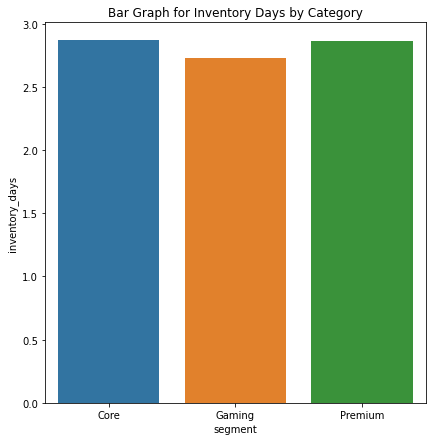

In [79]:
# Inventory days by segment barplot

df = train.loc[train['date'] >= "2022-06-01"]
df = df.groupby(['segment']).sum().reset_index()
df['inventory_days'] = df['inventory_units']/df['sales_units']
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.barplot(x='segment',y='inventory_days',data=df)
plt.title("Bar Graph for Inventory Days by Category")

Text(0.5, 1.0, 'Bar Graph for Inventory Days by reporterhq_id')

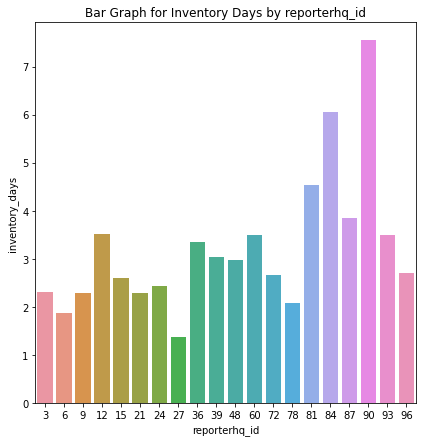

In [87]:
# Inventory days by reporterhq barplot

df = train.loc[train['date'] >= "2022-06-01"]
df = df.groupby(['reporterhq_id']).sum().reset_index()
df['inventory_days'] = df['inventory_units']/df['sales_units']
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.barplot(x='reporterhq_id',y='inventory_days',data=df)
plt.title("Bar Graph for Inventory Days by reporterhq_id")

In [81]:
df = train.groupby(['date','segment']).sum().reset_index()
df

,date,segment,year_week,product_number,reporterhq_id,specs,display_size,sales_units,inventory_units
0,2019-04-13,Core,201915,233919,3,106370,15.6,2.0,20.0
1,2019-04-20,Core,201916,233919,3,106370,15.6,4.0,43.0
2,2019-04-27,Core,403834,467838,27,212740,31.2,122.0,184.0
3,2019-05-04,Core,403836,467838,27,212740,31.2,61.0,219.0
4,2019-05-11,Core,403838,467838,27,212740,31.2,32.0,254.0
...,...,...,...,...,...,...,...,...,...
479,2023-04-29,Gaming,25694259,19830804,6483,13206319,2055.7,3161.0,9821.0
480,2023-04-29,Premium,22457187,12694794,5232,9357659,1583.6,3096.0,8798.0
481,2023-05-06,Core,46330822,28783881,8784,32843188,3507.6,4898.0,13512.0
482,2023-05-06,Gaming,25896704,19996620,6543,13308821,2071.8,2808.0,9714.0


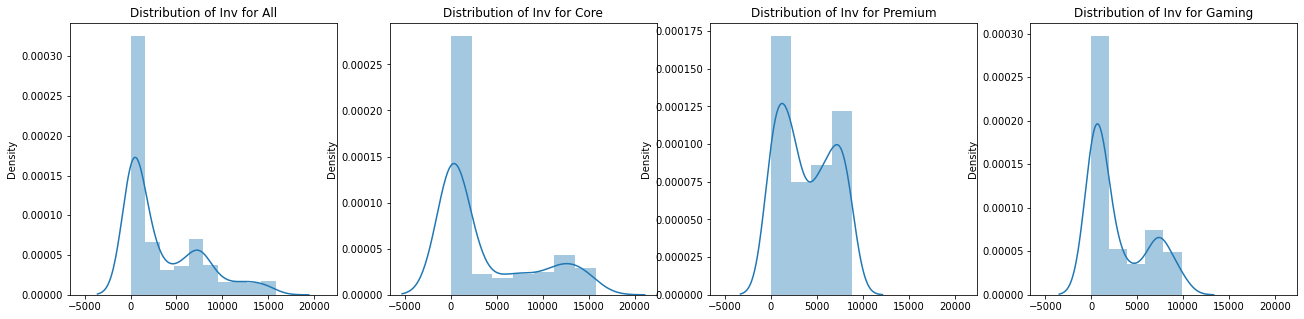

In [82]:
# Distribution of inv

fig, axes = plt.subplots(1, 4, sharex = True, figsize=(22,5))

sns.distplot(df['inventory_units'].values, ax = axes[0])
axes[0].set_title("Distribution of Inv for All")

sns.distplot(df[df['segment']=="Core"]['inventory_units'].values, ax = axes[1])
axes[1].set_title("Distribution of Inv for Core")

sns.distplot(df[df['segment']=="Premium"]['inventory_units'].values, ax = axes[2])
axes[2].set_title("Distribution of Inv for Premium")

sns.distplot(df[df['segment']=="Gaming"]['inventory_units'].values, ax = axes[3])
axes[3].set_title("Distribution of Inv for Gaming")

plt.show()

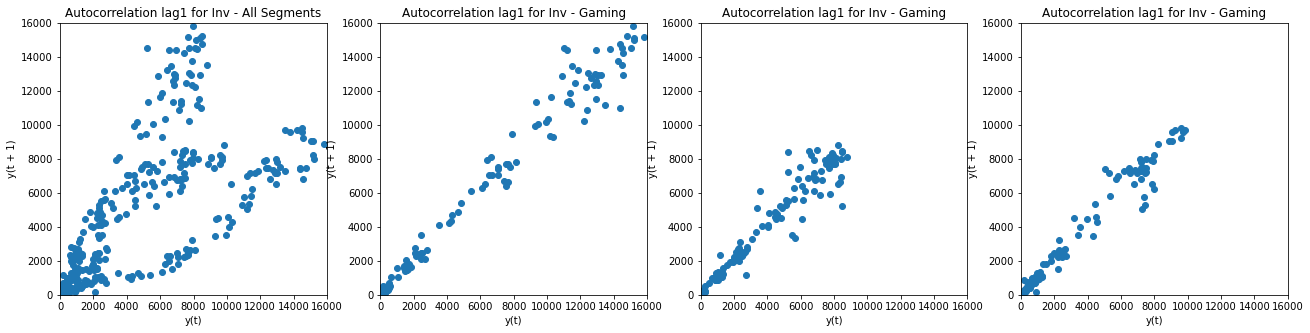

In [86]:
fig, axes = plt.subplots(1, 4, sharex = True, figsize=(22,5))

pd.plotting.lag_plot(df['inventory_units'], lag=1, ax = axes[0])
axes[0].set_title("Autocorrelation lag1 for Inv - All Segments")
axes[0].set_xlim(0,16000)
axes[0].set_ylim(0,16000)

pd.plotting.lag_plot(df[df['segment']=="Core"]['inventory_units'], lag=1, ax = axes[1])
axes[1].set_title("Autocorrelation lag1 for Inv - Gaming")
axes[1].set_xlim(0,16000)
axes[1].set_ylim(0,16000)

pd.plotting.lag_plot(df[df['segment']=="Premium"]['inventory_units'], lag=1, ax = axes[2])
axes[2].set_title("Autocorrelation lag1 for Inv - Gaming")
axes[2].set_xlim(0,16000)
axes[2].set_ylim(0,16000)

pd.plotting.lag_plot(df[df['segment']=="Gaming"]['inventory_units'], lag=1, ax = axes[3])
axes[3].set_title("Autocorrelation lag1 for Inv - Gaming")
axes[3].set_xlim(0,16000)
axes[3].set_ylim(0,16000)

plt.show()

## Top products

In [85]:
total_inv = train.groupby('product_number')['inventory_units'].sum()

# Select the top 3 products with the highest total inv

top_5_products = total_inv.nlargest(10)

# Print the top 3 products

top_5_products

# Done

product_number
17766     30110.0
58233     29288.0
112518    28083.0
75012     25253.0
45402     22166.0
240828    22141.0
46389     19690.0
48363     19024.0
234906    16608.0
24675     15895.0
Name: inventory_units, dtype: float64